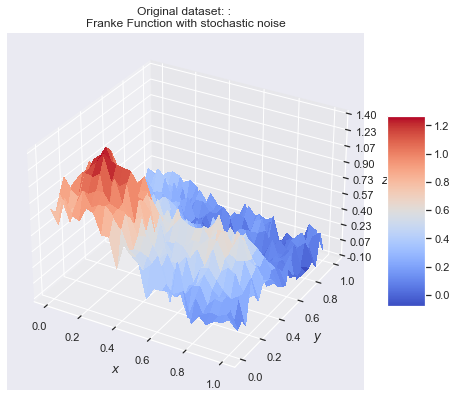

Performance with default values: t0, t1 = 5, 50
––––––––––––––––––––––––––––––––––––––––––––
OLS - MSE: 0.0715
OLS - R2: 0.1471
Ridge - MSE: 0.0715
Ridge - R2: 0.1471
OLS with SK - MSE: 0.0408
OLS with SK - R2: 0.5133
––––––––––––––––––––––––––––––––––––––––––––


In [9]:
import numpy as np
from random import random, seed
from dataset import create_xyz_dataset, create_X, Plot_FrankeFunction
from regression import OLSRegression, RidgeRegression, MSE_BS
from misc import find_min_indexes
import matplotlib.pyplot as plt

np.random.seed(1234)

# Degree of the polynomial
degree=5
# Datapoints (squared root of datapoints -> meshgrid)
n = 25
# Paramaters of noise distribution
mu_n = 0; sigma_n = 0.1

# Create vanilla dataset:
x,y,z = create_xyz_dataset(n,mu_n, sigma_n)
Plot_FrankeFunction(x,y,z, title="Original dataset: : \nFranke Function with stochastic noise")
# Convertion because of meshgrid
z = z.ravel(); n=n**2
X = create_X(x, y, degree)


n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches

# Default value
ols = OLSRegression(X,z)
ridge = RidgeRegression(X,z)
ols.split().rescale().fitSGD(n_epochs = n_epochs, m = m)
ridge.split().rescale().fitSGD(n_epochs = n_epochs, m = m)
print("Performance with default values: t0, t1 = 5, 50")
print("––––––––––––––––––––––––––––––––––––––––––––")
print("OLS - MSE:", ols.MSE_test())
print("OLS - R2:", ols.R2_test())
print("Ridge - MSE:", ols.MSE_test())
print("Ridge - R2:", ols.R2_test())
ols.fitSGD_SK()
print("OLS with SK - MSE:", ols.MSE_test())
print("OLS with SK - R2:", ols.R2_test())
print("––––––––––––––––––––––––––––––––––––––––––––")

No handles with labels found to put in legend.


Ridge: Best lambda value λ = 0.0001


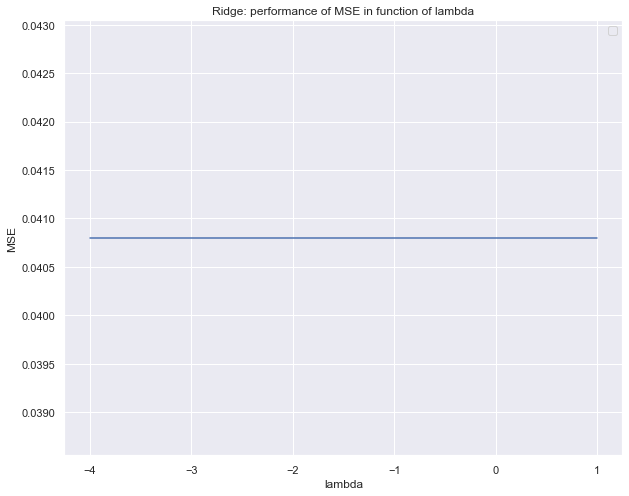

In [20]:
####### LAMBDA PERFORMANCE
nlambdas = 100
lambdas = np.logspace(-4, 1, nlambdas)
mse_ridge = np.zeros(nlambdas)

for i in range(nlambdas):
    ridge.set_lambda(lambdas[i])
    ridge.fitSGD(n_epochs = n_epochs, m = m)
    mse_ridge[i] = ols.MSE_test()

ind= find_min_indexes(mse_ridge)[0]
lmd=lambdas[ind]
ridge.set_lambda(lmd)
print("Ridge: Best lambda value λ = "+str(lmd))

fig = plt.figure(figsize=(10,8))
plt.plot(np.log10(lambdas),mse_ridge)
plt.xlabel("lambda")
plt.ylabel("MSE")
plt.title("Ridge: performance of MSE in function of lambda")
plt.grid(True)
plt.legend()
plt.show()

LEARNING RATE PERFORMANCE
OLS: Best learning rate η_0 = 4.00e-05 is given by t0 = 0.01 and t1 = 250
Ridge: Best learning rate η_0 = 2.00e-02 is given by t0 = 5 and t1 = 250
OLS with SK : Best learning rate η_0 = 1.00e-03 is given by t0 = 0.05 and t1 = 50


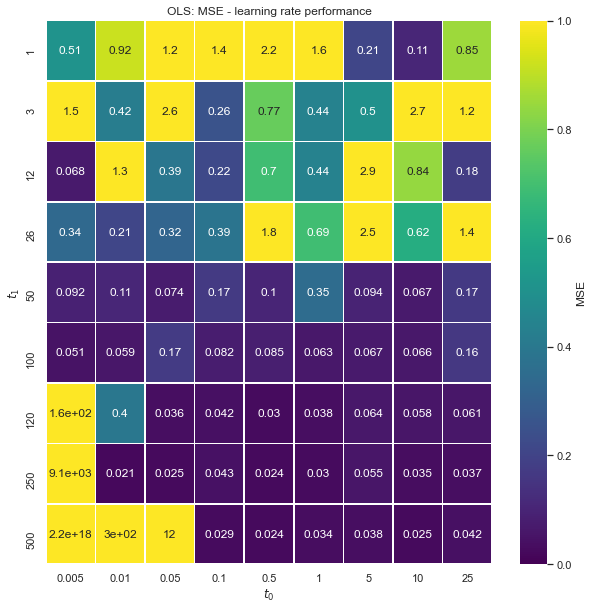

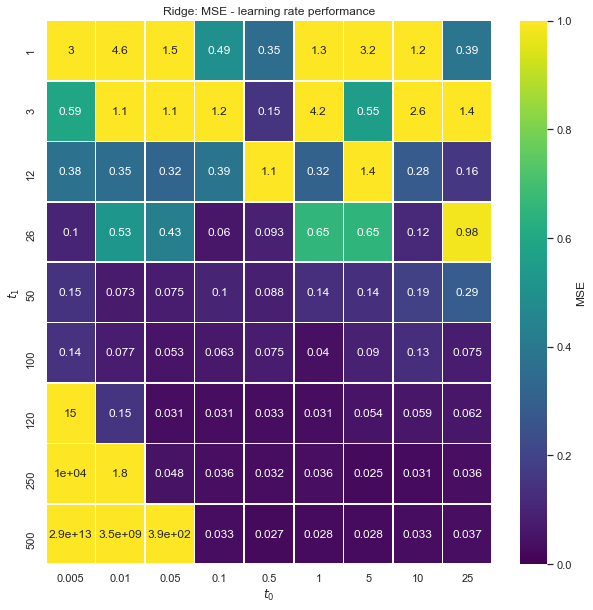

In [10]:
### LEARNING RATE
print("LEARNING RATE PERFORMANCE")

t0_vals = [0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 25]
t1_vals = [1, 3, 12, 26, 50, 100, 120, 250, 500]

mse_ols = np.zeros((len(t0_vals), len(t1_vals)))
mse_ridge = np.zeros((len(t0_vals), len(t1_vals)))
mse_ols_sk = np.zeros((len(t0_vals), len(t1_vals)))

for i in range(len(t0_vals)):
    for j in range(len(t1_vals)):
        
        ols.fitSGD(n_epochs, m, t0_vals[i], t1_vals[j])
        ridge.fitSGD(n_epochs, m, t0_vals[i], t1_vals[j])
        
        mse_ols[i][j] = ols.MSE_test()
        mse_ridge[i][j] = ridge.MSE_test()
        
        ols.fitSGD_SK()
        mse_ols_sk[i][j] = ols.MSE_test()
        
        """
        if mse_ols[i][j] > 1.:
            mse_ols[i][j] = 1.
            
        if mse_ridge[i][j] > 1.:
            mse_ridge[i][j] = 1.
        """

import seaborn as sns

sns.set()

ind= find_min_indexes(mse_ols)
eta0_ols=t0_vals[ind[1]]/t1_vals[ind[0]]
t0_ols=t0_vals[ind[1]]
t1_ols=t1_vals[ind[0]]
print("OLS: Best learning rate \N{greek small letter eta}_0 = {:.2e}".format(eta0_ols)+" is given by t0 = "+str(t0_ols)+" and t1 = "+str(t1_ols))
ind= find_min_indexes(mse_ridge)
eta0_ridge=t0_vals[ind[1]]/t1_vals[ind[0]]
t0_ridge=t0_vals[ind[1]]
t1_ridge=t1_vals[ind[0]]
print("Ridge: Best learning rate \N{greek small letter eta}_0 = {:.2e}".format(eta0_ridge)+" is given by t0 = "+str(t0_ridge)+" and t1 = "+str(t1_ridge))
ind= find_min_indexes(mse_ols_sk)
print("OLS with SK : Best learning rate \N{greek small letter eta}_0 = {:.2e}".format(t0_vals[ind[1]]/t1_vals[ind[0]])+" is given by t0 = "+str(t0_vals[ind[1]])+" and t1 = "+str(t1_vals[ind[0]]))

 
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(mse_ols, annot=True, ax=ax, cmap="viridis", xticklabels=t0_vals, cbar_kws={'label': 'MSE'}, yticklabels=t1_vals, vmin=0, vmax=1, linewidths=.5)
ax.set_title("OLS: MSE - learning rate performance")
ax.set_ylabel("$t_1$")
ax.set_xlabel("$t_0$")
plt.show()

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(mse_ridge, annot=True, ax=ax, cmap="viridis", xticklabels=t0_vals, cbar_kws={'label': 'MSE'}, yticklabels=t1_vals, vmin=0, vmax=1, linewidths=.5)
ax.set_title("Ridge: MSE - learning rate performance")
ax.set_ylabel("$t_1$")
ax.set_xlabel("$t_0$")
plt.show()

N_MINIBATCHES PERFORMANCE
OLS: Best number of mini-batches = 50
Ridge: Best number of mini-batches = 30


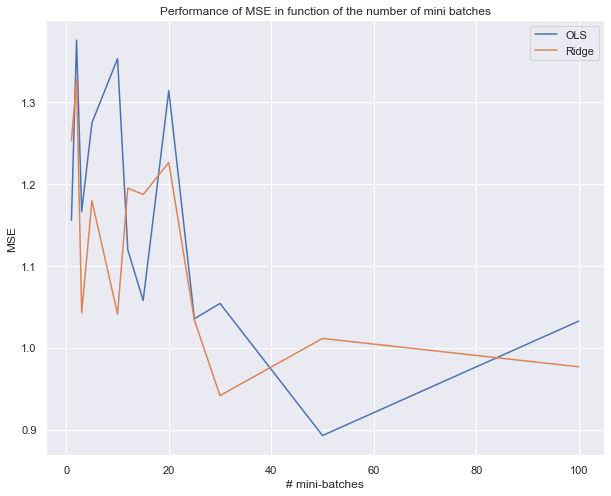

In [6]:
### N_MINIBATCHES
print("N_MINIBATCHES PERFORMANCE")

m_vals = [1, 2, 3, 5, 10, 12, 15, 20, 25, 30, 50, 100]

mse_ols = np.zeros((len(m_vals)))
mse_ridge = np.zeros((len(m_vals)))
mse_ols_sk = np.zeros((len(m_vals)))

for i in range(len(m_vals)):
        
    y_pred_ols = ols.predictSGD_BS(n_epochs, i, t0_ols, t1_ols)
    y_pred_ridge = ridge.predictSGD_BS(n_epochs, i, t0_ridge, t1_ridge)

    mse_ols[i] = MSE_BS(y_pred_ols, ols.y_test) #ols.MSE_test()
    mse_ridge[i] = MSE_BS(y_pred_ridge, ridge.y_test) #ridge.MSE_test()
    
    #ols.predictSGD()
    #mse_ols_sk[i] = ols.MSE_test()

ind= find_min_indexes(mse_ols)[0]
m_ols = m_vals[ind]
print("OLS: Best number of mini-batches = "+str(m_ols))
ind= find_min_indexes(mse_ridge)[0]
m_ridge = m_vals[ind]
print("Ridge: Best number of mini-batches = "+str(m_ridge))
ind= find_min_indexes(mse_ols_sk)[0]
print("OLS with SK: Best number of mini-batches = "+str(m_vals[ind]))

fig = plt.figure(figsize=(10,8))
plt.plot(m_vals,mse_ols, label="OLS")
plt.plot(m_vals,mse_ridge, label="Ridge")
plt.xlabel("# mini-batches")
plt.ylabel("MSE")
plt.title("Performance of MSE in function of the number of mini batches")
plt.grid(True)
plt.legend()
plt.show()

N_EPOCHS PERFORMANCE
OLS: Best n_epochs = 150
Ridge: Best n_epochs = 200


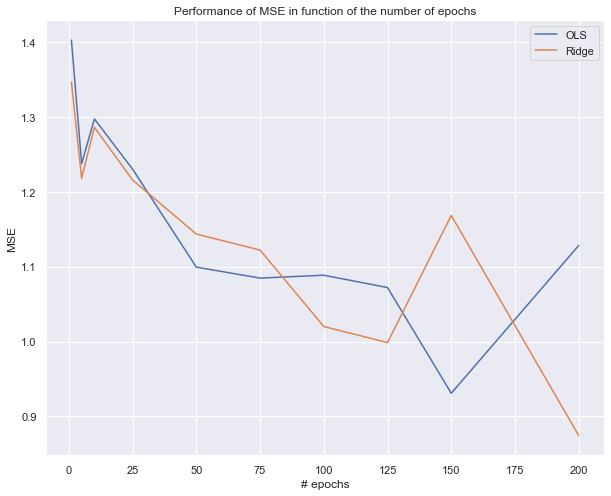

In [7]:
### N_EPOCHS
print("N_EPOCHS PERFORMANCE")

epochs_vals = [1, 5, 10, 25, 50, 75, 100, 125, 150, 200]

mse_ols = np.zeros((len(epochs_vals)))
mse_ridge = np.zeros((len(epochs_vals)))

for i in range(len(epochs_vals)):
        
    y_pred_ols = ols.predictSGD_BS(i, m_ols, t0_ols, t1_ols)
    y_pred_ridge = ridge.predictSGD_BS(i, m_ridge, t0_ridge, t1_ridge)

    mse_ols[i] = MSE_BS(y_pred_ols, ols.y_test) #ols.MSE_test()
    mse_ridge[i] = MSE_BS(y_pred_ridge, ridge.y_test) #ridge.MSE_test()

ind= find_min_indexes(mse_ols)[0]
n_epochs_ols = epochs_vals[ind]
print("OLS: Best n_epochs = "+str(n_epochs_ols))
ind= find_min_indexes(mse_ridge)[0]
n_epochs_ridge = epochs_vals[ind]
print("Ridge: Best n_epochs = "+str(n_epochs_ridge))
      
fig = plt.figure(figsize=(10,8))
plt.plot(epochs_vals,mse_ols, label="OLS")
plt.plot(epochs_vals,mse_ridge, label="Ridge")
plt.xlabel("# epochs")
plt.ylabel("MSE")
plt.title("Performance of MSE in function of the number of epochs")
plt.grid(True)
plt.legend()
plt.show()

In [22]:
### LAMBDA VS LEARNING RATE
print("LEARNING RATE PERFORMANCE")
"""
eta_vals = [1, 3, 12, 26, 50, 100, 120, 250, 500]

mse_ridge = np.zeros((len(lambdas), len(t1_vals)))

for i in range(len(t0_vals)):
    for j in range(len(t1_vals)):
        
        ols.fitSGD(n_epochs, m, t0_vals[i], t1_vals[j])
        ridge.fitSGD(n_epochs, m, t0_vals[i], t1_vals[j])
        
        mse_ols[i][j] = ols.MSE_test()
        mse_ridge[i][j] = ridge.MSE_test()
        
        ols.fitSGD_SK()
        mse_ols_sk[i][j] = ols.MSE_test()
        

sns.set()

ind= find_min_indexes(mse_ols)
eta0_ols=t0_vals[ind[1]]/t1_vals[ind[0]]
t0_ols=t0_vals[ind[1]]
t1_ols=t1_vals[ind[0]]
print("OLS: Best learning rate \N{greek small letter eta}_0 = {:.2e}".format(eta0_ols)+" is given by t0 = "+str(t0_ols)+" and t1 = "+str(t1_ols))
ind= find_min_indexes(mse_ridge)
eta0_ridge=t0_vals[ind[1]]/t1_vals[ind[0]]
t0_ridge=t0_vals[ind[1]]
t1_ridge=t1_vals[ind[0]]
print("Ridge: Best learning rate \N{greek small letter eta}_0 = {:.2e}".format(eta0_ridge)+" is given by t0 = "+str(t0_ridge)+" and t1 = "+str(t1_ridge))
ind= find_min_indexes(mse_ols_sk)
print("OLS with SK : Best learning rate \N{greek small letter eta}_0 = {:.2e}".format(t0_vals[ind[1]]/t1_vals[ind[0]])+" is given by t0 = "+str(t0_vals[ind[1]])+" and t1 = "+str(t1_vals[ind[0]]))

 
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(mse_ols, annot=True, ax=ax, cmap="viridis", xticklabels=t0_vals, cbar_kws={'label': 'MSE'}, yticklabels=t1_vals, vmin=0, vmax=1, linewidths=.5)
ax.set_title("OLS: MSE - learning rate performance")
ax.set_ylabel("$t_1$")
ax.set_xlabel("$t_0$")
plt.show()

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(mse_ridge, annot=True, ax=ax, cmap="viridis", xticklabels=t0_vals, cbar_kws={'label': 'MSE'}, yticklabels=t1_vals, vmin=0, vmax=1, linewidths=.5)
ax.set_title("Ridge: MSE - learning rate performance")
ax.set_ylabel("$t_1$")
ax.set_xlabel("$t_0$")
plt.show()
"""

LEARNING RATE PERFORMANCE


'\neta_vals = [1, 3, 12, 26, 50, 100, 120, 250, 500]\n\nmse_ridge = np.zeros((len(lambdas), len(t1_vals)))\n\nfor i in range(len(t0_vals)):\n    for j in range(len(t1_vals)):\n        \n        ols.fitSGD(n_epochs, m, t0_vals[i], t1_vals[j])\n        ridge.fitSGD(n_epochs, m, t0_vals[i], t1_vals[j])\n        \n        mse_ols[i][j] = ols.MSE_test()\n        mse_ridge[i][j] = ridge.MSE_test()\n        \n        ols.fitSGD_SK()\n        mse_ols_sk[i][j] = ols.MSE_test()\n        \n\nsns.set()\n\nind= find_min_indexes(mse_ols)\neta0_ols=t0_vals[ind[1]]/t1_vals[ind[0]]\nt0_ols=t0_vals[ind[1]]\nt1_ols=t1_vals[ind[0]]\nprint("OLS: Best learning rate η_0 = {:.2e}".format(eta0_ols)+" is given by t0 = "+str(t0_ols)+" and t1 = "+str(t1_ols))\nind= find_min_indexes(mse_ridge)\neta0_ridge=t0_vals[ind[1]]/t1_vals[ind[0]]\nt0_ridge=t0_vals[ind[1]]\nt1_ridge=t1_vals[ind[0]]\nprint("Ridge: Best learning rate η_0 = {:.2e}".format(eta0_ridge)+" is given by t0 = "+str(t0_ridge)+" and t1 = "+str(t1_ridge)